In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

import os

In [4]:
df = pd.read_csv("./clocks.csv")
df.head()


,class index,filepaths,labels,data set
0,0,train/1-00/0.jpg,1_00,train
1,0,train/1-00/1.jpg,1_00,train
2,0,train/1-00/11.jpg,1_00,train
3,0,train/1-00/12.jpg,1_00,train
4,0,train/1-00/13.jpg,1_00,train


In [5]:
train_df = df[df['data set'] == 'train' ]
train_df.head()

,class index,filepaths,labels,data set
0,0,train/1-00/0.jpg,1_00,train
1,0,train/1-00/1.jpg,1_00,train
2,0,train/1-00/11.jpg,1_00,train
3,0,train/1-00/12.jpg,1_00,train
4,0,train/1-00/13.jpg,1_00,train


In [6]:
test_df = df[df['data set'] != 'train' ]
test_df.reset_index(inplace = True)
test_df.drop(columns = ['index'],inplace = True)
test_df.head()

C:\Users\suvan\AppData\Local\Temp\ipykernel_17232\1776149690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns = ['index'],inplace = True)


,class index,filepaths,labels,data set
0,0,test/1-00/10.jpg,1_00,test
1,0,test/1-00/31.jpg,1_00,test
2,0,test/1-00/38.jpg,1_00,test
3,0,test/1-00/50.jpg,1_00,test
4,0,test/1-00/53.jpg,1_00,test


In [7]:
len(train_df['labels'].unique())

144

In [8]:
print(train_df.shape)
print(test_df.shape)

(11520, 4)
(2880, 4)


In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
dir = './train'
dirs = os.listdir(dir)
imshow_dirs = []
for i in dirs : 
    step = os.listdir(dir+ '/'+ i)
    imshow_dirs.append(dir+ '/' + i + '/' + step[1])
print(len(imshow_dirs))    

144


In [14]:
imshow_dirs[0]

'./train/1-00/1.jpg'

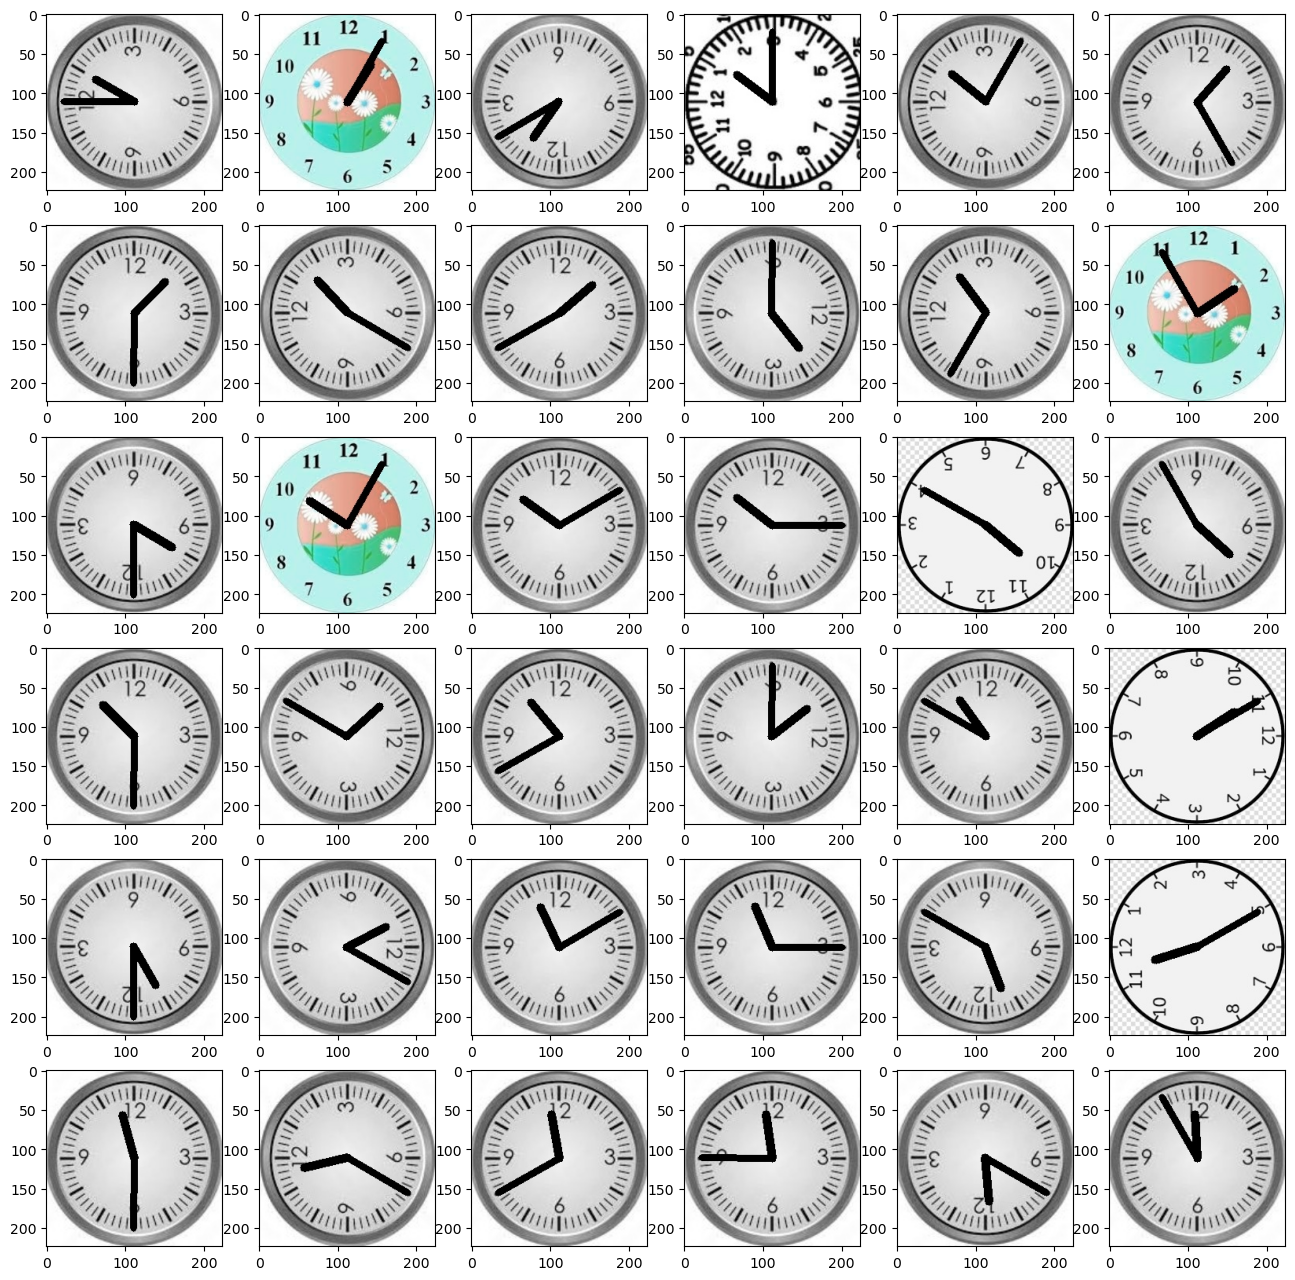

In [15]:
fig, ax = plt.subplots(6,6,figsize=(16,16))
for n in range(6):
    for m in range(6):
        path =imshow_dirs[m + 6*n]
        image = cv2.imread(str(path))
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generation = ImageDataGenerator(rescale=1.0/255)

In [18]:
train_generation = data_generation.flow_from_directory(
                                        "./train",
                                        target_size=(38,38),
                                        batch_size=10,
                                        class_mode='categorical',
                                       color_mode = 'grayscale' )
test_generation = data_generation.flow_from_directory(
                                        "./test",
                                        target_size=(38,38),
                                        batch_size=10,
                                        class_mode='categorical',
                                        color_mode = 'grayscale')
val_generation = data_generation.flow_from_directory(
                                        "./valid",
                                        target_size=(38,38),
                                        batch_size=10,
                                        class_mode='categorical',
                                        color_mode = 'grayscale')

Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.


In [23]:
Model_3  = tf.keras.models.Sequential()
Model_3.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,1),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_3.add(tf.keras.layers.BatchNormalization())
Model_3.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.BatchNormalization())
Model_3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_3.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.BatchNormalization())
Model_3.add(tf.keras.layers.Dropout((0.3)))
Model_3.add(tf.keras.layers.Flatten())
Model_3.add(tf.keras.layers.Dense(1024,activation='relu'))
Model_3.add(tf.keras.layers.Dropout((0.5)))
Model_3.add(tf.keras.layers.Dense(144,activation='softmax'))

In [24]:
Model_3.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [27]:
Model_3.fit_generator(train_generation,validation_data=test_generation,epochs=5)

Epoch 1/5


C:\Users\suvan\AppData\Local\Temp\ipykernel_17232\2071568187.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Model_3.fit_generator(train_generation,validation_data=test_generation,epochs=5)


1152/1152 [==============================] - 294s 255ms/step - loss: 1.1929 - accuracy: 0.7472 - val_loss: 0.7995 - val_accuracy: 0.8375
Epoch 2/5
1152/1152 [==============================] - 294s 255ms/step - loss: 1.0598 - accuracy: 0.7777 - val_loss: 0.7433 - val_accuracy: 0.8465
Epoch 3/5
1152/1152 [==============================] - 289s 250ms/step - loss: 1.0397 - accuracy: 0.7818 - val_loss: 0.7773 - val_accuracy: 0.8472
Epoch 4/5
1152/1152 [==============================] - 284s 246ms/step - loss: 1.0232 - accuracy: 0.7893 - val_loss: 0.7584 - val_accuracy: 0.8444
Epoch 5/5
1152/1152 [==============================] - 283s 246ms/step - loss: 0.9114 - accuracy: 0.8117 - val_loss: 0.6818 - val_accuracy: 0.8576


<Axes: >

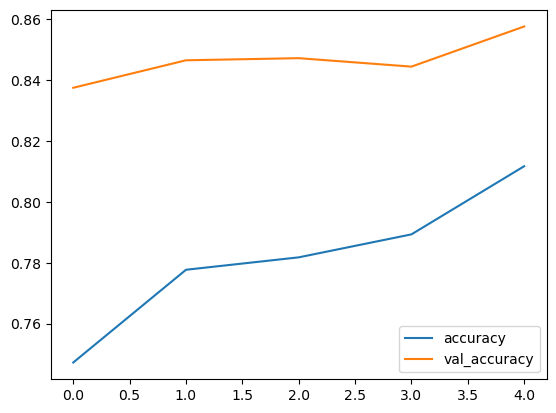

In [28]:
losses = pd.DataFrame(Model_3.history.history)
losses[['accuracy','val_accuracy']].plot()

In [29]:
Model_3.evaluate_generator(val_generation)

C:\Users\suvan\AppData\Local\Temp\ipykernel_17232\1548710750.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  Model_3.evaluate_generator(val_generation)


[0.7316774725914001, 0.8513888716697693]

In [ ]:
s